Using Logistic regression we will analys the dataset and find out the best independent variables for the dependent variable and build the prediction model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("E:\Data Science\datasets\hr_analytics.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

<big>Lets now explore the data</big>

In [4]:
emp_left = df[df.left==1]
emp_left.shape

(3571, 10)

In [5]:
emp_ret = df[df.left==0]
emp_ret.shape

(11428, 10)

<big>Average numbers for all columns sorted by the employee(left)</big>

In [6]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<big>From above table we can draw following conclusions</big>

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)<br>
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)<br>
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm<br>

<big>Visualize the data</big>

In [7]:
plt.rcParams["figure.figsize"] = (10,5)
plt.style.use(['dark_background'])


<AxesSubplot:xlabel='salary'>

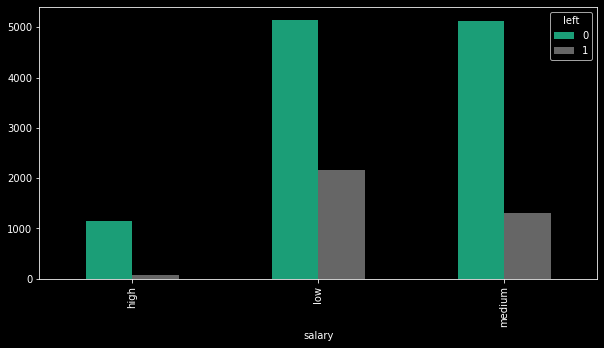

In [8]:
pd.crosstab(df.salary, df.left).plot(kind='bar', colormap="Dark2")

Above bar chart shows employees with high salaries are likely to not leave the company

<big>Department wise employee retention rate</big>

<AxesSubplot:xlabel='Department'>

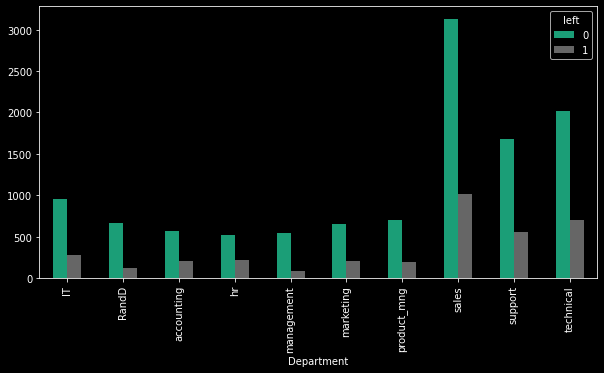

In [9]:
pd.crosstab(df.Department,df.left).plot(kind='bar', colormap="Dark2")

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

<big>From the data analysis so far we can conclude that we will use following variables as independant variables in our </big>model
<ol>
<li>Satisfaction Level</li>
<li>Average Monthly Hours</li>
<li>Promotion Last 5 Years</li>
<li>Salary</li>
</ol>

In [10]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


<big>Tackle salary dummy variable</big><br>

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [11]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [12]:
df_with_dummies = pd.concat([subdf, salary_dummies], axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


<big>Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it</big>

In [13]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


<big>Lets build and train our model</big>

In [14]:
X = df_with_dummies
y = df.left

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Debjeet's PC\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<big>Test our model</big>

In [17]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
model.score(X_train, y_train), model.score(X_test,y_test)

(0.7724810400866738, 0.786)